## DIABETIC PATIENT PREDICTION

1. Import the diabetes data
2. check whether it has null values
3. check how many rows and columns the dataset has
4. check each column datatype
5. generate statistics for each column
6. check the data imbalanace
7. explore each variable and identify the shape and outliers
8. Create Scatterplot for each varaible to visualize relationship
9. Generate Correlation for each variable
10. Visualize the correlation
11. Get an idea how the traget variable is different for each column of diabetic and non-diabetic patient
12. create x and y variable for machine learning
13.  split the data in train and test
14.  Run the below mentioned model and find accuracy, classification report and confusion metric a. Logistic Regression b. Decision Tree c. RandomForest d. SVM e. XGBoost
15. Find the variables that impact the most
16.  Test the model with external values

## Import libraries and datasets/Analyzing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading CSV file
data= pd.read_csv("diabetes.csv")
#showing initial 10 records
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
#checking is there any null values in the table
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Describing the data in terms of statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape # so data has 9 columns and having 768 records

(768, 9)

In [6]:
data.dtypes # data.info ,data.columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.iloc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

## Perform Exploratory Data Analysis

In [8]:
data['Outcome'].value_counts()
# here you can see we are having 500 non diabetic patients and 268 diabetic patients

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
data['Outcome'].value_counts(normalize=True)
# by making normalize is equals to True you are getting your percentage that here you have 65% of non diabetic data and 34% of diabetic data

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

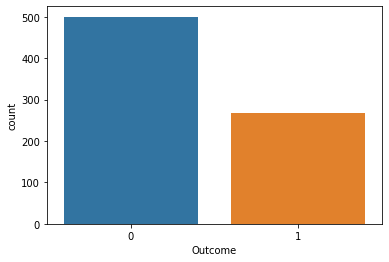

In [10]:
sns.countplot(x='Outcome',data=data)

c:\Users\sabhe\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


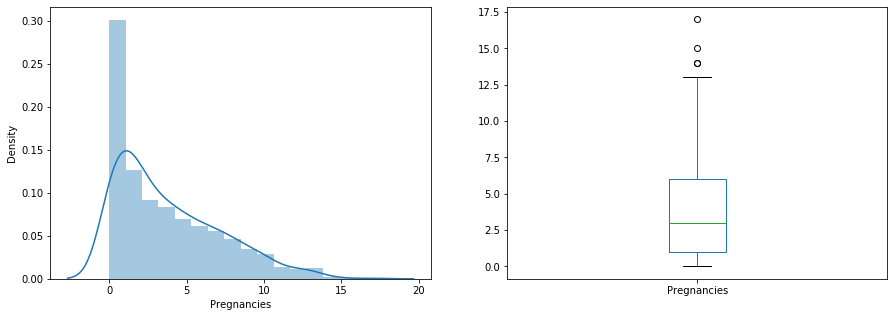

In [11]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Pregnancies'])
plt.subplot(122)
data['Pregnancies'].plot.box(figsize=(15,5))

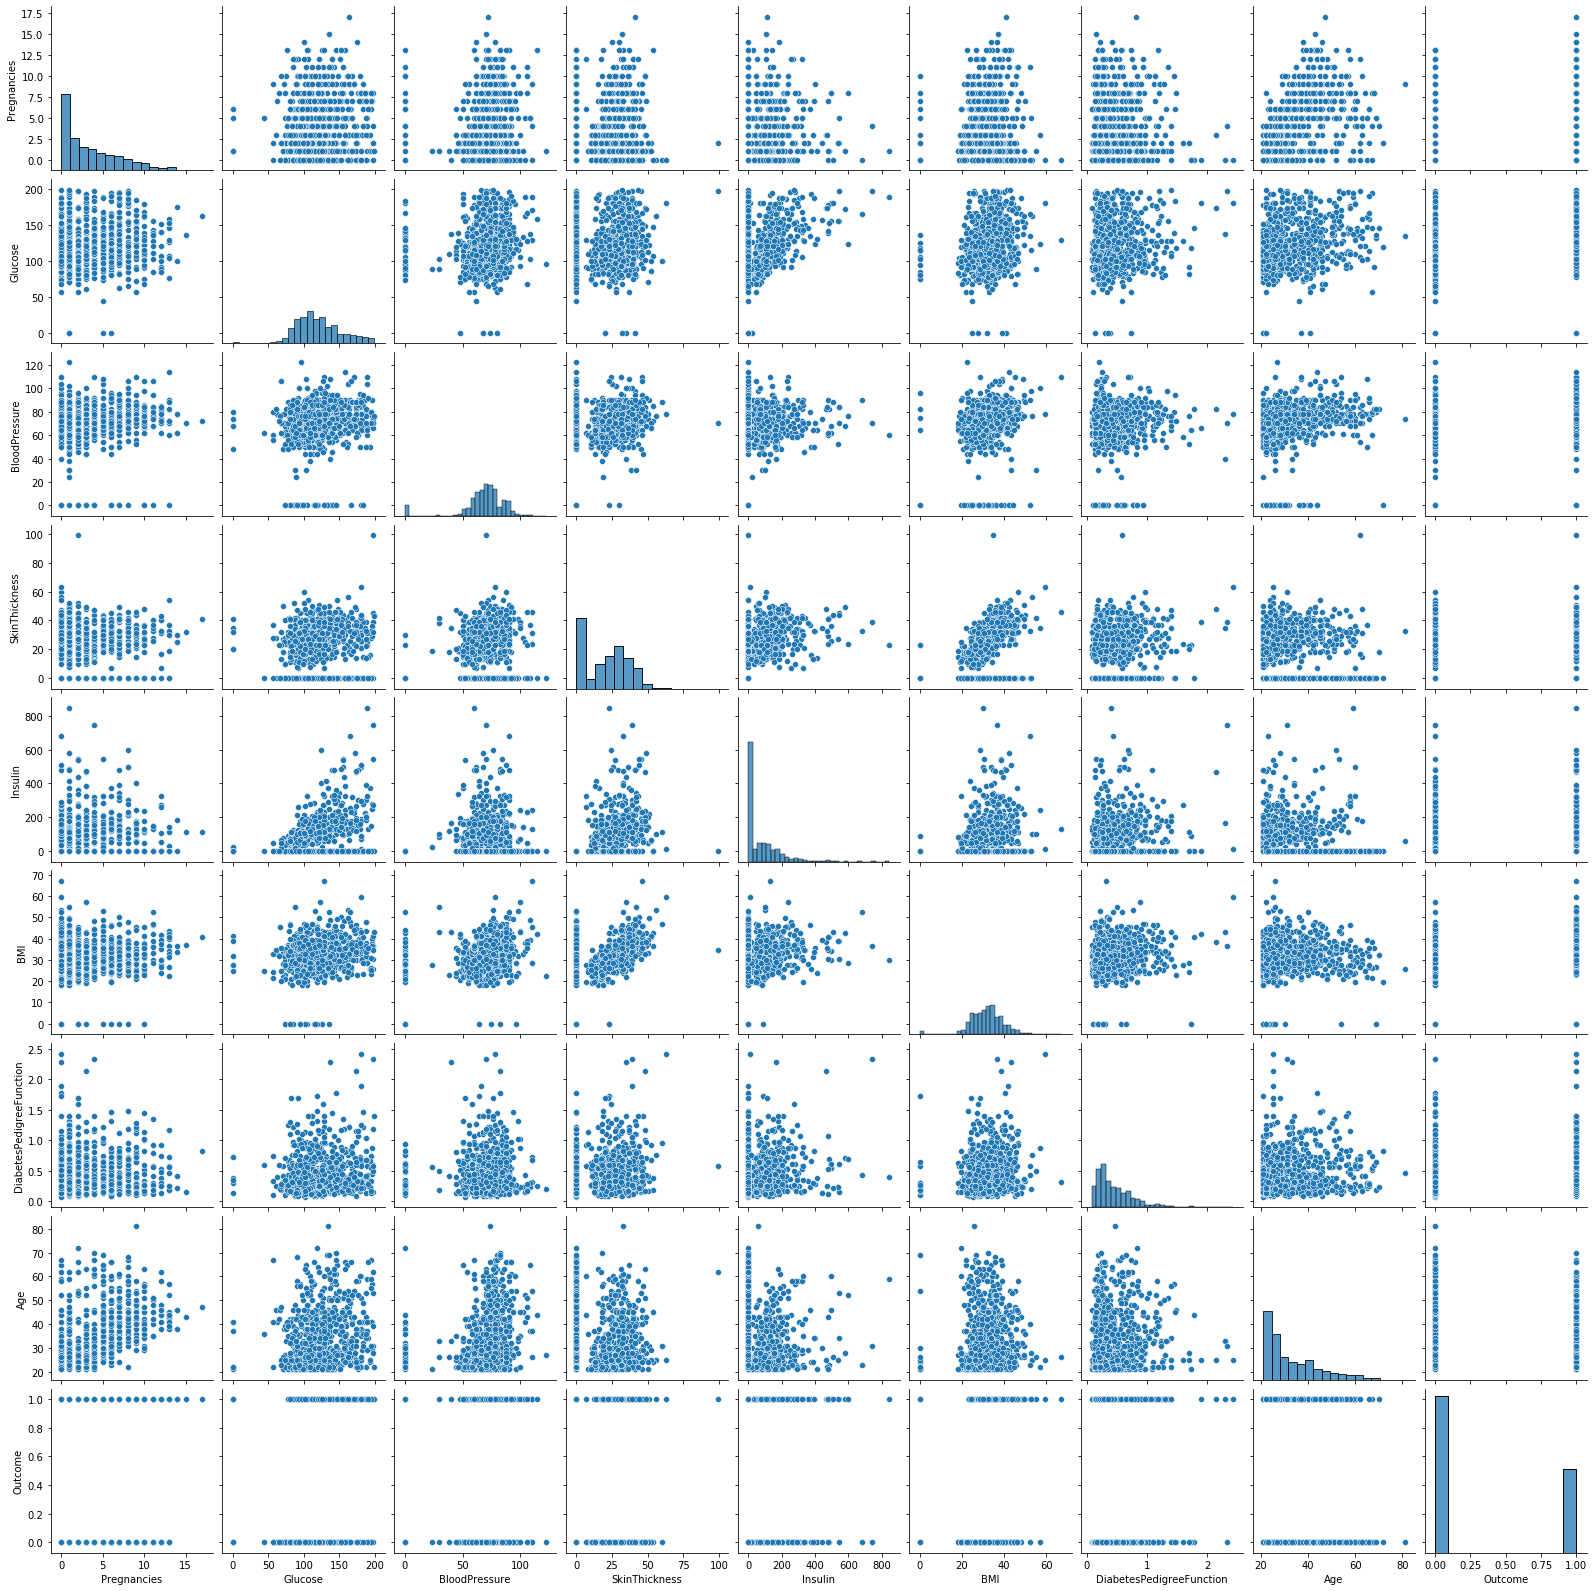

In [12]:
sns.pairplot(data)

In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


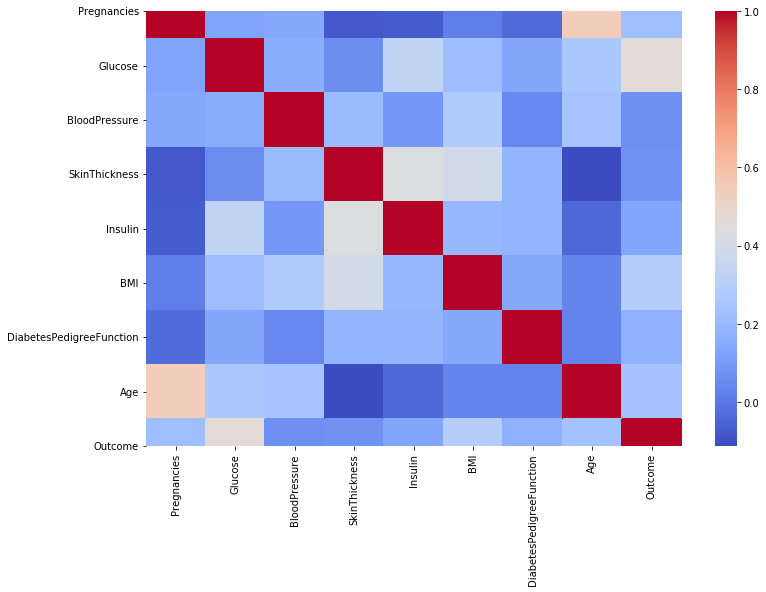

In [14]:
data_corr=data.corr()
ax = plt.subplots(figsize=(12,8))
sns.heatmap(data_corr,cmap='coolwarm')

In [15]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [36]:
X=data.drop(columns='Outcome',axis=1)
Y=data['Outcome']


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=123)

## A. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

c:\Users\sabhe\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [20]:
logreg_predict=logreg.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(Y_test,logreg_predict)

0.7922077922077922

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,logreg_predict))

[[87  9]
 [23 35]]


In [24]:

print(classification_report(Y_test,logreg_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84        96
           1       0.80      0.60      0.69        58

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.79      0.79      0.79       154



## D. SVM 

In [25]:
from sklearn import svm
svm_model=svm.SVC(kernel='linear') # Initiliazing the model


In [26]:
svm_model.fit(X_train,Y_train)
svm_model_predict=svm_model.predict(X_test)


In [27]:
accuracy_score(Y_test,svm_model_predict)

0.8116883116883117

In [28]:
print(classification_report(Y_test,svm_model_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        96
           1       0.82      0.64      0.72        58

    accuracy                           0.81       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



In [29]:
print(confusion_matrix(Y_test,svm_model_predict))

[[88  8]
 [21 37]]


## C. RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=200)

In [31]:
rfc_model.fit(X_train,Y_train)
rfc_predict=rfc_model.predict(X_test)

In [32]:
accuracy_score(Y_test,rfc_predict)

0.7857142857142857

In [33]:
print(classification_report(Y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        96
           1       0.72      0.71      0.71        58

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [34]:
print(confusion_matrix(Y_test,rfc_predict))

[[80 16]
 [17 41]]


## B. Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor 
dtr_model=DecisionTreeRegressor(random_state=0)


In [39]:
dtr_model.fit(X_train,Y_train)
dtr_predict=dtr_model.predict(X_test)

In [41]:
accuracy_score(Y_test,dtr_predict)

0.7792207792207793

In [42]:
classification_report(Y_test,dtr_predict)

'              precision    recall  f1-score   support\n\n           0       0.85      0.78      0.82        96\n           1       0.68      0.78      0.73        58\n\n    accuracy                           0.78       154\n   macro avg       0.77      0.78      0.77       154\nweighted avg       0.79      0.78      0.78       154\n'

In [44]:
print(confusion_matrix(Y_test,dtr_predict))

[[75 21]
 [13 45]]


## E. XGBoost